# Assignment — Introduction to network science and power law

In [13]:
from zlib import adler32
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import pandas as pd
import networkx as nx
import requests
from scipy.stats import powerlaw

In this assignment, we will consider some basics of networkx

In [14]:
assert nx.__version__ >= '2.5'

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Task 1. Reading graph from a file (0 points)

In [17]:
url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_adjlist.txt'
open('the_lord_of_the_rings_adjlist.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_edgelist.txt'
open('the_lord_of_the_rings_edgelist.txt', 'wb').write(requests.get(url).content);

A common representation of a graph is an adjacency matrix, but many real-world graphs are sparse (many zeros in an adjacency matrix), so in most cases data is stored in cheap sparse formats

edge list
adjacency list
Edge list is a list of pairs of nodes — a target and destination of edges. Here is an edge list of an interaction network of films "The Lord of the Rings" (2001-2003).



In [18]:
with open('the_lord_of_the_rings_edgelist.txt') as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND




Adjacency list is a list of lists of nodes where the first node is a root and others are leafs

In [19]:
with open('the_lord_of_the_rings_adjlist.txt') as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



For most cases we can use given functions in networkx:

nx.read_adjlist
nx.read_edgelist
nx.read_weighted_edgelist
In the further task, read graphs the_lord_of_the_rings_edgelist.txt, the_lord_of_the_rings_adjlist.txt and combine them into a single graph such that the same nodes are merged in a single node preserving all adjacent edges.

Hint: use graph.add_edges_from



In [20]:
def read_and_merge_graphs(edgelist_path, adjlist_path):
     # YOUR CODE HERE
    G1 = nx.read_adjlist(adjlist_path, delimiter=', ')
    G2 = nx.read_edgelist(edgelist_path, delimiter=', ')
    
    G1.add_edges_from(G2.edges)
    return G1

In [21]:
G = read_and_merge_graphs("the_lord_of_the_rings_edgelist.txt", 
                          "the_lord_of_the_rings_adjlist.txt")
assert set(G.neighbors('SAM')) == {
    'BILBO',
    'ELROND',
    'FRODO',
    'GALADRIEL',
    'GANDALF',
    'GOLLUM',
    'GORBAG',
    'SHAGRAT',
    'SMEAGOL'}
assert nx.number_of_nodes(G) == 35
assert nx.number_of_edges(G) == 98

# Task 2. Directed graphs (0 points)

The direction of edges could be crucial feature for many tasks, e.g. link analysis. Directed edges are also known as links or arcs. In networkx, the type of graph is defined by a constructor: nx.Graph for undirected graph, nx.DiGraph for directed graph. A directed graph can have an asymmetric adjacency matrix.

In [97]:
diG = nx.DiGraph()
diG.add_edges_from([[0, 1], [1, 2]])
nx.to_numpy_array(diG) #Возвращает матрицу смежности графа в виде массива NumPy.

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

Write a function convert_to_digraph that takes an undirected graph and returns a new directed graph where the direction is defined by the rule: the node i follows to j if the length of name of j is at least the length of name of j. Keep the ordering of nodes and the node attribute name.

In [101]:
def convert_to_digraph(G):
    # YOUR CODE HERE
    names = list(G.nodes)
    newG = nx.Graph()
    newG.add_nodes_from(range(len(G)))
    for i, j in G.edges:
        newG.add_edge(names.index(i), names.index(j))
        newG.nodes[names.index(i)]['name'] = i
        newG.nodes[names.index(j)]['name'] = j
    return newG
    # one-line solution
    return nx.convert_node_labels_to_integers(G, label_attribute='name')

In [102]:
newG = convert_node_names_to_int(G)
for i in range(len(G)):
    assert list(G.nodes)[i] == newG.nodes[i]['name']
assert np.allclose(nx.to_numpy_array(G), nx.to_numpy_array(newG))

NameError: name 'convert_node_names_to_int' is not defined

# Task 3. Basic statistics (0 points)

Networkx provides a simple interface for getting basic graph statistics (look at the documentation to recall definitions):

nx.radius

nx.diameter

nx.average_shortest_path_length

nx.average_clustering

For example, here are statistics of a path graph with 3 nodes:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


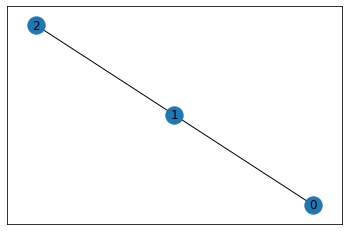

In [31]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Your task is to create graphs by given statistics. We can create a graph using simple networkx interfaces. For example, we can create a graph by passing an edgelist.

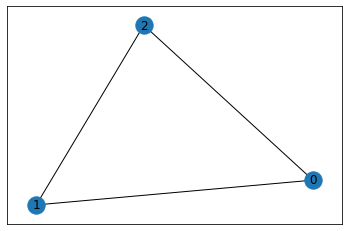

In [32]:
G = nx.Graph([[0, 1], [1, 2], [2, 0]])
nx.draw_networkx(G)

Or create an empty graph and then add edges one by one.

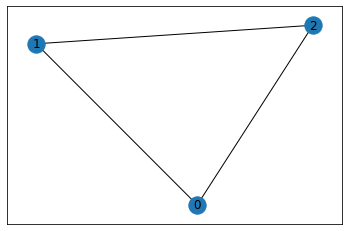

In [33]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 0)
nx.draw_networkx(G)

Your task is to create graphs by given statistics.

Write a function graph1 that returns a graph with a radius 3 and diameter 3.

In [34]:
def graph1():
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(1, 5)
    graph.add_edge(1, 2)
    graph.add_edge(5, 4)
    graph.add_edge(4, 6)
    graph.add_edge(6, 3)
    graph.add_edge(3, 2)
    print('Radius: ', nx.radius(graph))
    print('Diameter: ', nx.diameter(graph))
    nx.draw_networkx(graph)
    return graph

Radius:  3
Diameter:  3


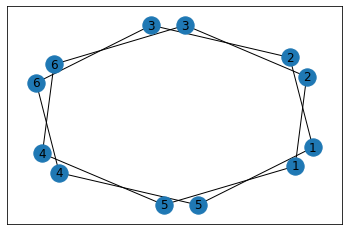

In [35]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3
nx.draw_networkx(G)

Write a function graph2 that returns a graph with a diameter of at least 5 average shortest path lengths.

In [93]:
def graph2():
    # YOUR CODE HERE
    n = 100
    m = 10
    G = nx.complete_graph(n+1)
    for i in range(n, n+m):
        G.add_edge(i, i+1)
    return G

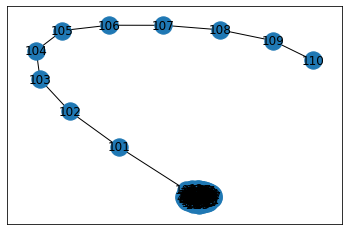

In [94]:
G = graph2()
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)
nx.draw_networkx(G)

Write a function graph3 that returns a graph with an average clustering coefficient between 0.1 and 0.11.

In [38]:
def graph3():
    # YOUR CODE HERE
    graph = nx.Graph()
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
    graph.add_edge(4, 5)
    graph.add_edge(5, 10)
    graph.add_edge(6, 7)
    graph.add_edge(7, 8)
    graph.add_edge(8, 9)
    graph.add_edge(9, 10)
    graph.add_edge(10, 11)
    graph.add_edge(11, 12)
    graph.add_edge(12, 13)
    graph.add_edge(13, 14)
    graph.add_edge(14, 10)
    graph.add_edge(14, 15)
    graph.add_edge(15, 16)
    graph.add_edge(16, 11)
    graph.add_edge(10, 18)
    graph.add_edge(18, 9)
    graph.add_edge(20, 11)
    graph.add_edge(16, 10)
    graph.add_edge(21, 8)
    print('Average clustering coefficient: ', nx.average_clustering(graph))
    nx.draw_networkx(graph)
    return graph

Average clustering coefficient:  0.10350877192982455


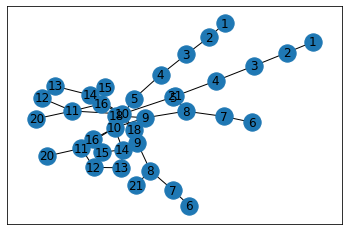

In [39]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11
nx.draw_networkx(G)

# Task 4. Graph layout (0 points)


A graph layout is a dictionary with a location of every node: keys are nodes and values are x, y positions. By default in nx.draw_networkx, it is the spring layout — a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects.

In [40]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([ 0.52859654, -0.42811695]),
 1: array([ 1.       , -0.7738722]),
 2: array([0.2443289 , 0.03198573]),
 3: array([-0.03511336, -0.15109786]),
 4: array([-0.18854645,  0.16671182]),
 5: array([-0.56230047,  0.04258787]),
 6: array([-0.54732588, -0.40756285]),
 7: array([-0.09035215,  0.52922989]),
 8: array([-0.62892311,  0.57548524]),
 9: array([0.27963599, 0.4146493 ])}

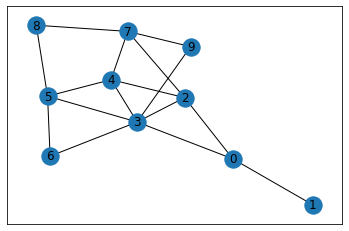

In [41]:
nx.draw_networkx(G, pos=layout)


The Kamada Kawai layout is based on path-length cost-function. Sometimes, it is quite similar to the spring layout, however a significant difference is that the spring layout is random and the Kamada Kawai is deterministic.

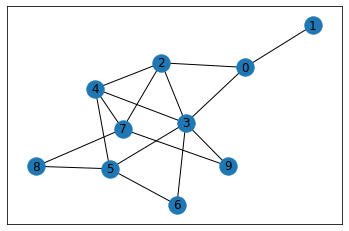

In [42]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)


Circular layout allows to draw a graph where nodes are in a circle.

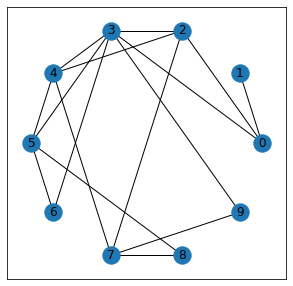

In [43]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Bipartite layout allows to draw bipartite graph.

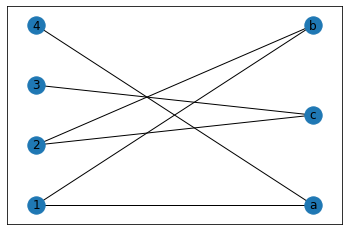

In [44]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

There are other layouts in networkx, also there are some useful parameters that you can find in documentation. Next, let us visualize a coappearance network of characters in The Matrix — a 1999 American science fiction action film written and directed by the Wachowskis. The dataset is taken from https://moviegalaxies.com/.

In [45]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);

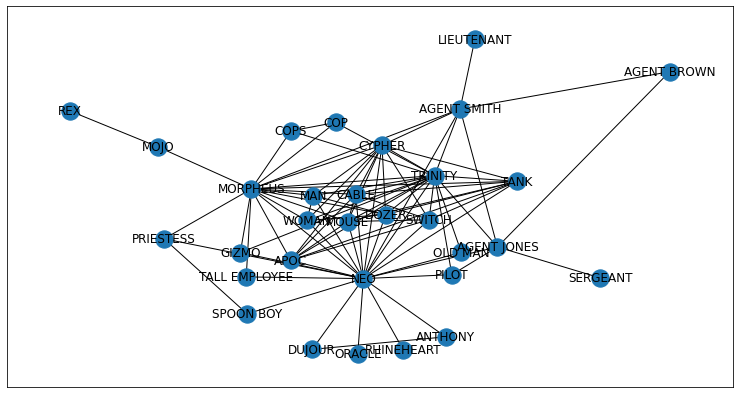

In [46]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)


Your task is to draw the matrix graph using the kamada kawai layout with nonlinear modification to obtain a denser layout away from the NEO node. Let us define a proximity coefficient using Gaussian kernel
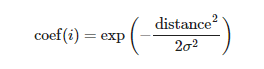

where a distance is the Euclidean distance from the node  to the NEO node,  is the constant. Then the nodes should be moved towards the NEO node such that
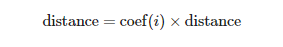

The simplest way to do it is to center the layout so that the NEO node is in x=0 y=0 and then to multiply all node positions by the proximity coefficient.

Write a function dense_neo_layout that takes a layout, sigma and returns a new (dense) layout.

Hint: use np.linalg.norm to calculate Euclidean norm.

In [47]:
def dense_neo_layout(layout, sigma):
    # YOUR CODE HERE
    sigma = {}
    for node in layout:
        sigma[node] = layout[node] - layout['NEO']
        distance = np.linalg.norm(sigma[node])
        coef = np.exp(-distance**2 / 2 / sigma**2)
        sigma[node] = sigma[node] * coef
    return sigma

In [48]:
layout = nx.kamada_kawai_layout(matrixG)
layout = dense_neo_layout(layout, sigma=1.5)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

TypeError: unsupported operand type(s) for ** or pow(): 'dict' and 'int'

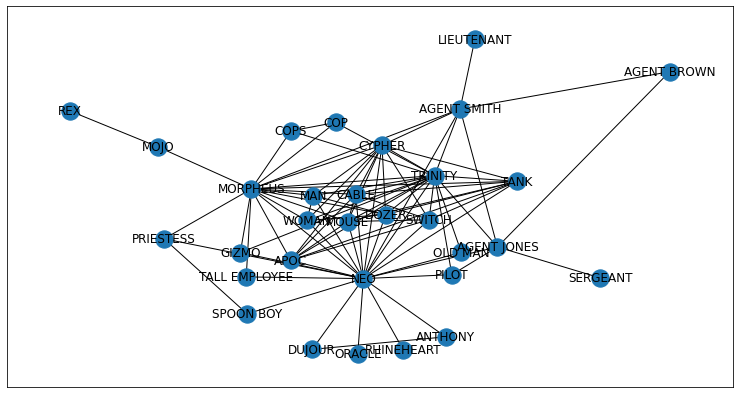

In [49]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

# Task 5. Nodes visualization (2 points)

We can set a node size using draw_networkx with a parameter node_size. It should be a list of values ordered by G.nodes. For example, consider a simple path graph.

In [50]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))


Let us set a size 200 for the node 0, 300 for 1, 400 for 2.

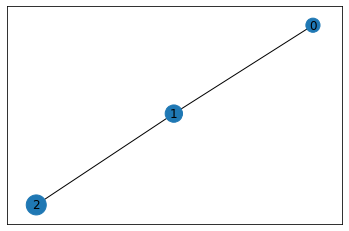

In [51]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

To color nodes, we can use node_color. It should be a list of colors:

a tuple of float RGB 0-1 values: (red, green, blue)

a tuple of float RGBA 0-1 values: (red, green, blue, alpha)

a string — color name

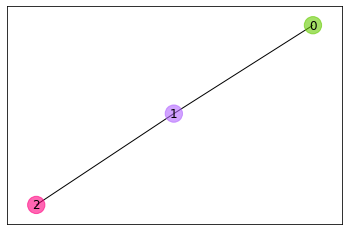

In [52]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

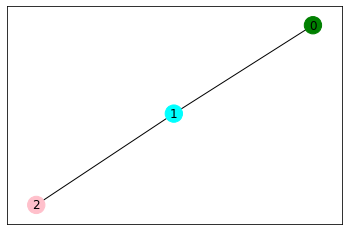

In [53]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Also we can use a colors from matplotlib colormaps. Discrete:

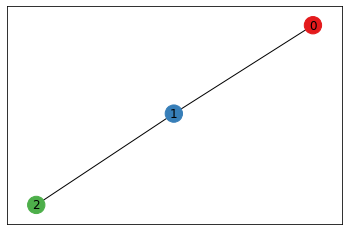

In [54]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Or continuous:

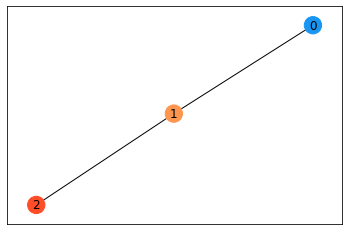

In [55]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Another option of coloring nodes is to pass a list of single values by the node_color and colormap by the cmap parameter. In this case, the lowest value will assigned to the first color in colormap and vise versa.

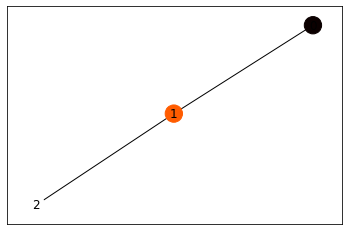

In [56]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])


We can forcibly set a color range using vmin and vmax.

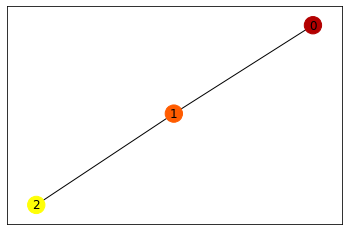

In [57]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

We can border nodes using edgecolors and linewidths parameters.

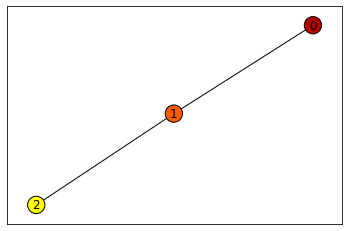

In [58]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Your task is to adjust a size and color of nodes in the matrix graph, size and color are taken from a node degree and node attribute G.nodes[node].

In [59]:
matrixG.nodes['NEO']

{'movie_id': 543,
 'Eccentricity': 3.0,
 'Closeness Centrality': 1.2666666666666666,
 'Betweenness Centrality': 197.97857142857137,
 'Degree': 23,
 'Component ID': 0,
 'Modularity Class': 2,
 'viz': {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1.0},
  'size': 20.0,
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0}},
 'label': 'NEO'}

Write a function drawing_nodes_params that takes a graph and returns a dictionary with parameters for nx.draw_networkx of the form {'G': graph, 'node_color': color, ...}. Parameters should contain a graph, kamada kawai layout, node colors from viz.color attribute. The colors should be converted from RGB range 0-255 to RGB range 0-1. The node size is a node degree G.degree[node] multiplied by 100.

In [60]:
def drawing_nodes_params(graph):
    # YOUR CODE HERE
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node] * 100)
    #return nx.draw_networkx({'G': graph, 'pos': layout, 'node_color': [ 'red', 'green', 'blue', 'alpha'], 'node_size': graph.nodes['NEO']})
    return params

In [61]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

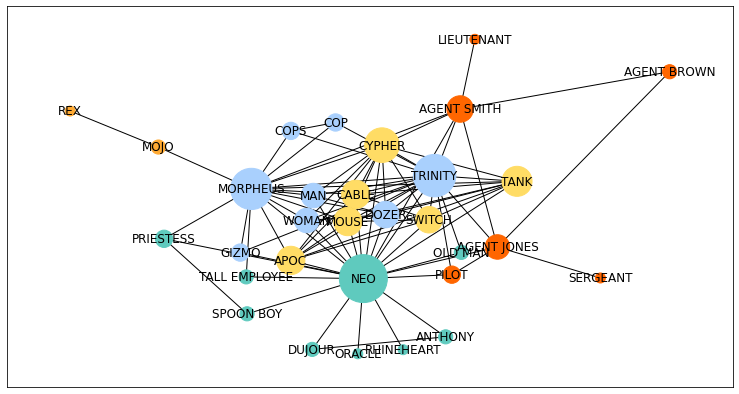

In [62]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Sometimes, it will be useful to draw nodes in nonlinear scale. If we want to make node sizes more comparable, we can use polynomial or exponential scale. On the other hand, we can use logarithmic scale to make sizes more similar.

Write a function drawing_nodes_polyparams that returns the same dictionary as the drawing_nodes_params function, but the node size is a sum of node degree in a power 3 and 10.
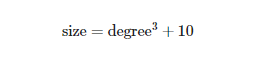

In [63]:
def drawing_nodes_polyparams(graph):
    # YOUR CODE HERE
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node]**3 + 10)
    return params

In [64]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

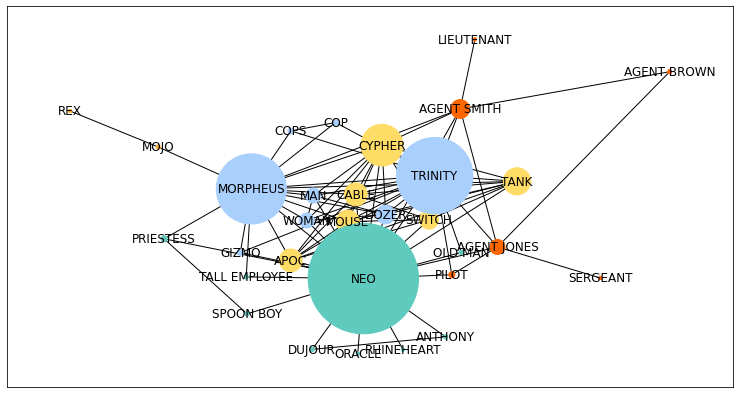

In [65]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

# Task 6. Degree distribution (2 points)

In this task, we will try to guess a graph by its degree distribution.

Graph A is described by the histogram [0, 2, 10] — 0 nodes with degree 0, 2 nodes with degree 1, 10 nodes with degree 2.

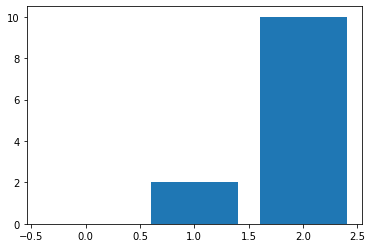

In [66]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [67]:
def generate_graph_a() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.Graph()
    
    G.add_edge(1, 2)
    G.add_edge(2, 3)
    
    G.add_edge(3, 4)
    G.add_edge(4, 5)
    G.add_edge(5, 6)
   
    G.add_edge(6, 7)
    G.add_edge(7, 8)
    G.add_edge(8, 9)
    G.add_edge(9, 10)
    G.add_edge(10, 11)
    nx.draw_networkx(G)
    return G

AssertionError: 

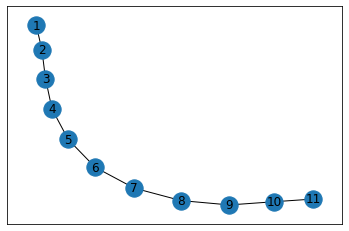

In [68]:
G = generate_graph_a()
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph B

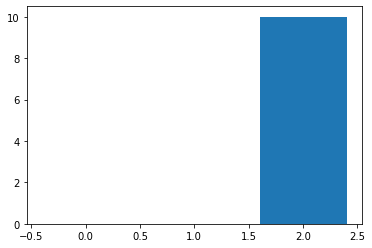

In [69]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [70]:
def generate_graph_b() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.Graph()
    
    G.add_edge(1, 2)
    G.add_edge(2, 3)
    
    G.add_edge(3, 4)
    G.add_edge(4, 5)
    G.add_edge(5, 6)
   
    G.add_edge(6, 7)
    G.add_edge(7, 8)
    G.add_edge(8, 9)
    G.add_edge(9, 10)
    G.add_edge(10, 11)
    G.add_edge(11, 1)
    nx.draw_networkx(G)
    return

AttributeError: 'NoneType' object has no attribute 'degree'

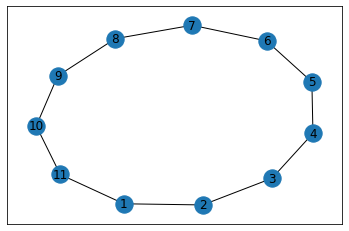

In [71]:
G = generate_graph_b()
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph C

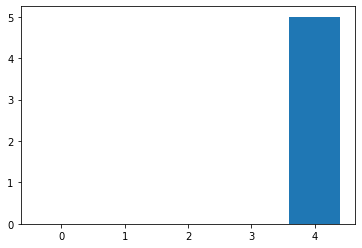

In [72]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [73]:
def generate_graph_c() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.complete_graph(5)
    nx.draw_networkx(G)
    return

AttributeError: 'NoneType' object has no attribute 'degree'

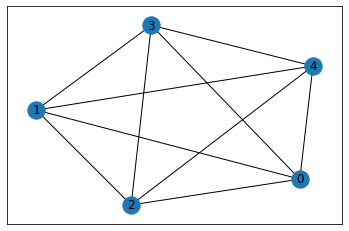

In [74]:
G = generate_graph_c()
assert nx.degree_histogram(G) == dens_c
assert nx.is_connected(G)
nx.draw_networkx(G)

Graph D

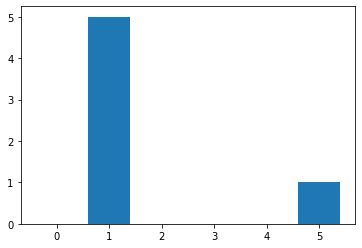

In [75]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [76]:
def generate_graph_d() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.Graph()
    G.add_edge(1, 6)
    G.add_edge(2, 6)
    G.add_edge(3, 6)
    
    G.add_edge(4, 6)
    G.add_edge(5, 6)
    G.add_edge(6, 1)
    G.add_edge(6, 2)
    G.add_edge(6, 3)
   
    G.add_edge(6, 4)
    G.add_edge(6, 5)
    
    
    nx.draw_networkx(G)
    return

AttributeError: 'NoneType' object has no attribute 'degree'

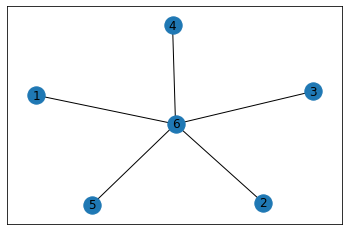

In [77]:
G = generate_graph_d()
assert nx.degree_histogram(G) == dens_d
assert nx.is_connected(G)
nx.draw_networkx(G)

# Task 7. Power law CDF (2 points)

Scale-free network has a Power law degree distribution. Let us take a closer look at this distribution. The PDF of the Power law is
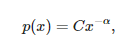

where C is a normalization constant
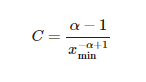

and a > 1 is called an exponent of the distribution.

In [78]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

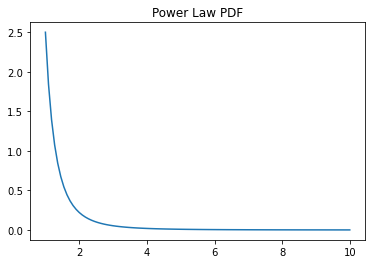

In [79]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Let us generate observations from a Power Law RV. The first step is to derive CDF of Powel law: 

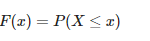

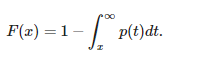

Take the integral, derive CDF analytically and then write a function power_law_cdf with parameters x, alpha and x_min.

In [80]:
def power_law_cdf(x, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    C = (alpha - 1) / x_min ** (1 - alpha)
    f=1-C*(-(x**(1-alpha))/(1-alpha))
    return f

In [81]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

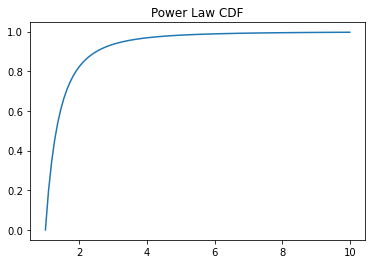

In [82]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

# Task 8. Power law PPF (2 points)

Let . . Next, define a random variable 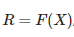 , so R  so  will be uniformly distributed on interval [0, 1] (proof). Good thing here is that we easily can generate uniformly distributed pseudorandom numbers and then transform them into Power Law. Let us find an expression for 
, where  is an observation from uniform distrubution on interval [0, 1].

Find an analytical form of 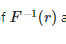
and write a function power_law_ppf (percent point function, also known as a quantile) with parameters r, alpha and x_min.

In [83]:
def power_law_ppf(r, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    X=(1-r)**(-1/(alpha-1))*x_min
    return X

In [84]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

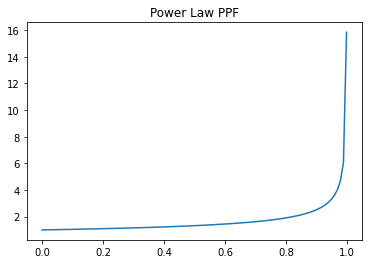

In [85]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Finally, we can generate observation from Power law distribution as follows:

Generate observation from uniform distribution on interval [0, 1]

Calculate PPF value of given observation

In [86]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Look at the histogram of the generated sample

In [87]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

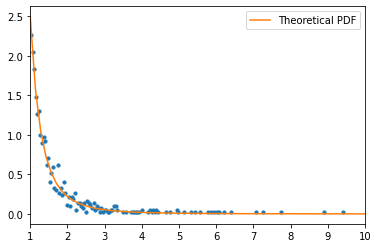

In [88]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()


And here is the same histogram in log-log scale

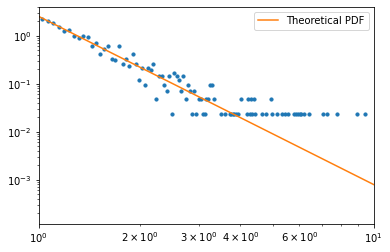

In [89]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

# Task 9. Estimation of alpha with linear binning (2 points)

Given observations from the Power Law distribution, try to estimate . The easiest way is to draw an empirical PDF with linear binning in log-log scale and apply linear regression. By linear binning we mean to keep a bin width is fixed.

Write a function alpha_lin_bins that takes a train set, number of linear bins and returns an estimated .

Hints:

Take log in both side of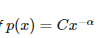

To calculate an empirical PDF, use np.histogram(x_train, bins=bins, density=True)

To calculate pseudoinverse matrix, use np.linalg.pinv
Also you can use fit-predict in sklearn.linear.LinearRegression


In [90]:
def alpha_lin_bins(x_train, bins):
    # YOUR CODE HERE
    histogram = np.histogram(x_train, bins)
    density = histogram[0][np.where(histogram[0] != 0)]
    density = np.log(density / len(x_train))
    bin_centers = np.log((histogram[1][1:] + histogram[1][:-1]) / 2)
    bin_centers = bin_centers[np.where(histogram[0] != 0)]
    bin_centers = bin_centers.reshape(-1, 1)
    regression = LinearRegression()
    regression.fit(bin_centers, density)
    return abs(regression.coef_[-1])
   

In [91]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

NameError: name 'LinearRegression' is not defined

NameError: name 'LinearRegression' is not defined

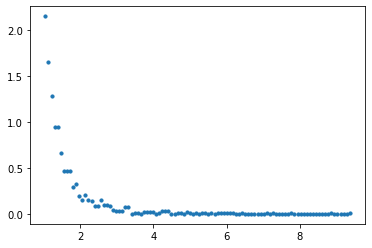

In [92]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()